# Decision Trees

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.colors import ListedColormap
from graphviz import Source
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.base import BaseEstimator
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
iris = load_iris(as_frame= True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

In [50]:
tree_clf = DecisionTreeClassifier(max_depth= 2, random_state= 42)

In [51]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [52]:
export_graphviz(
    tree_clf,
    out_file= 'iris_tree.dot',
    feature_names= ['petal length (cm)', 'petal width (cm)'],
    class_names= iris.target_names,
    filled= True, 
    rounded= True
)

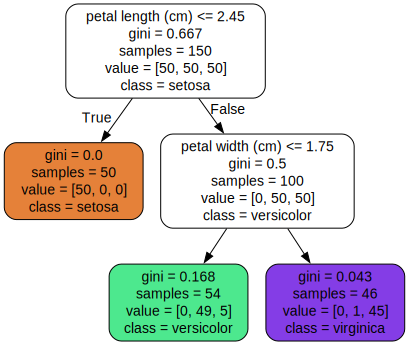

In [53]:
Source.from_file('iris_tree.dot')

In [54]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

## Plotting decision boundaries

In [55]:
tree_clf_deeper = DecisionTreeClassifier(max_depth= 3, random_state= 42)

tree_clf_deeper.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

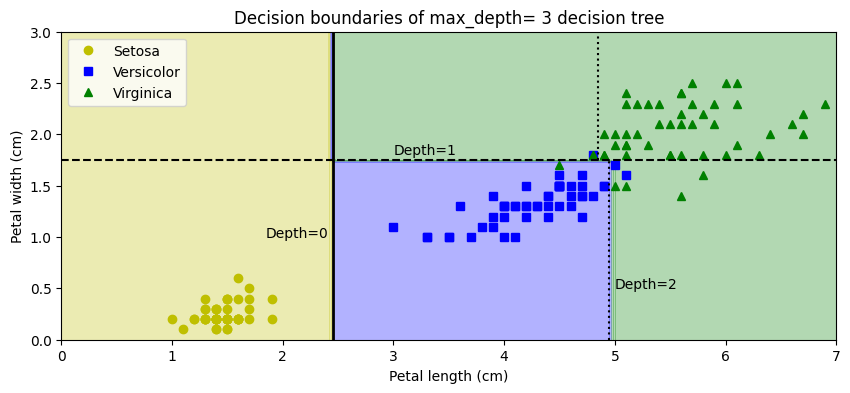

In [56]:
# getting thresholds
th1, th2, th3, th4 = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

plt.figure(figsize= (10, 4))

# iris data
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label= 'Setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label= 'Versicolor')
plt.plot(X[y == 2, 0], X[y == 2, 1], 'g^', label= 'Virginica')

# contours
custom_cmap = ListedColormap(['y', 'b', 'g'])

x0, x1 = np.meshgrid(np.linspace(0, 7, 100), np.linspace(0, 3, 100))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = tree_clf_deeper.predict(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, alpha= 0.3, cmap= custom_cmap)

# decision boundaries
plt.plot([th1, th1], [0, 3], 'k-', linewidth= 2)
plt.plot([0, 7], [th2, th2], 'k--')
plt.plot([th3, th3], [0, th2], 'k:')
plt.plot([th4, th4], [th2, 3], 'k:')

# text labels to different depths
plt.text(th1 - 0.6, 1, 'Depth=0')
plt.text(3, th2 + 0.06, 'Depth=1')
plt.text(5, 0.5, 'Depth=2')

# extra stuff
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision boundaries of max_depth= 3 decision tree')
plt.legend()
plt.axis([0, 7, 0, 3])
plt.show()

In [57]:
tree_clf.predict_proba(X[[132]])

array([[0.        , 0.02173913, 0.97826087]])

## Regularization Hyperparameters

In [58]:
X_moons, y_moons = make_moons(n_samples= 150, noise= 0.2, random_state= 42)

In [59]:
tree_1 = DecisionTreeClassifier(random_state= 42)
tree_2 = DecisionTreeClassifier(min_samples_leaf= 5, random_state= 42)

In [60]:
tree_1.fit(X_moons, y_moons)
tree_2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [61]:
def plot_decision_boundary(clf: BaseEstimator, X: np.ndarray, y: np.ndarray, axes: Axes) -> None:    
    custom_cmap = ListedColormap(['b', 'g'])

    x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha= 0.3, cmap= custom_cmap)
    plt.contour(x0, x1, y_pred, alpha= 0.8, cmap= 'Greys')
    
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
    
    plt.axis(axes)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$', rotation= 0)    

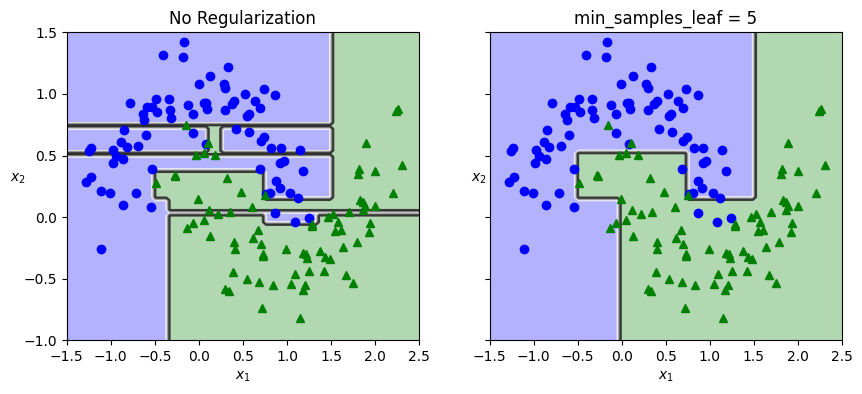

In [62]:
_, axes = plt.subplots(ncols= 2, figsize= (10, 4), sharey= True)
    
plt.sca(axes[0])
plot_decision_boundary(tree_1, X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title('No Regularization')
plt.sca(axes[1])
plot_decision_boundary(tree_2, X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title('min_samples_leaf = 5')
plt.show()

In [63]:
X_moons_test, y_moons_test = make_moons(100, noise= 0.2, random_state= 43)

In [64]:
tree_1.score(X_moons_test, y_moons_test)

0.89

In [65]:
tree_2.score(X_moons_test, y_moons_test)

0.92

## Regression

In [66]:
np.random.seed(42)
m = 200
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

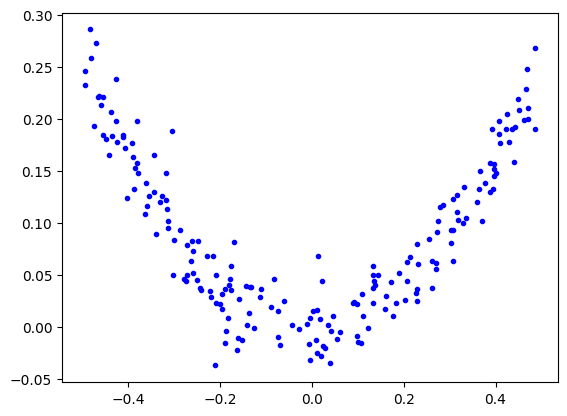

In [67]:
plt.plot(X_quad, y_quad, 'b.')

In [68]:
tree_reg = DecisionTreeRegressor(max_depth= 2, random_state= 42)

In [69]:
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[0] <= -0.303\nsquared_error = 0.006\nsamples = 200\nvalue = 0.088'),
 Text(0.25, 0.5, 'x[0] <= -0.408\nsquared_error = 0.002\nsamples = 44\nvalue = 0.172'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.001\nsamples = 20\nvalue = 0.213'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.001\nsamples = 24\nvalue = 0.138'),
 Text(0.75, 0.5, 'x[0] <= 0.272\nsquared_error = 0.005\nsamples = 156\nvalue = 0.065'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.001\nsamples = 110\nvalue = 0.028'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 46\nvalue = 0.154')]

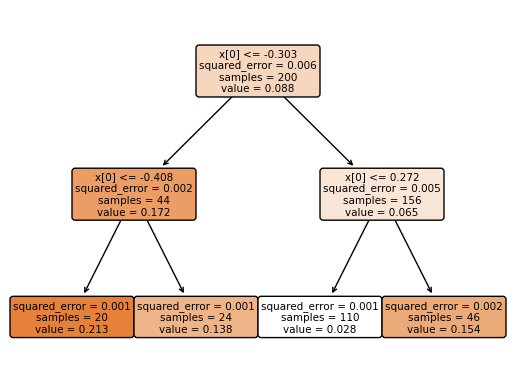

In [70]:
plot_tree(tree_reg, rounded= True, filled= True)

## Sensitivity to Axis Orientation

In [71]:
pca_pipe = make_pipeline(
    StandardScaler(),
    PCA()
)

In [72]:
X_rotated = pca_pipe.fit_transform(X)

In [73]:
tree_pca = DecisionTreeClassifier(max_depth= 2, random_state= 42)

In [78]:
tree_pca.fit(X_rotated, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

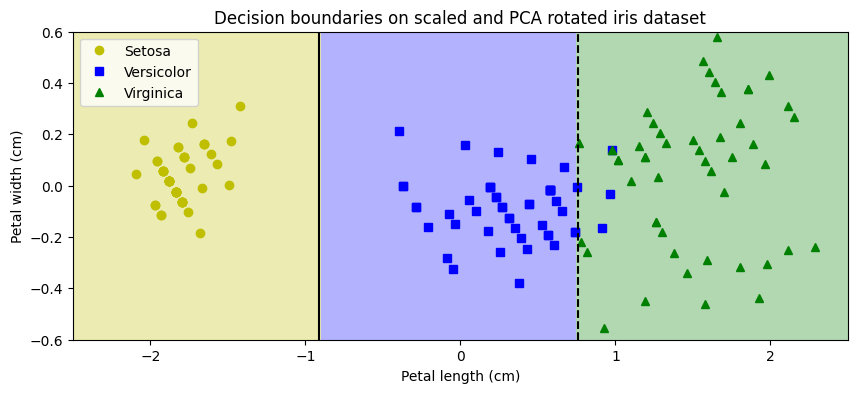

In [83]:
th1, th2 = tree_pca.tree_.threshold[[0, 2]]

plt.figure(figsize= (10, 4))

plt.plot(X_rotated[y == 0, 0], X_rotated[y == 0, 1], 'yo', label= 'Setosa')
plt.plot(X_rotated[y == 1, 0], X_rotated[y == 1, 1], 'bs', label= 'Versicolor')
plt.plot(X_rotated[y == 2, 0], X_rotated[y == 2, 1], 'g^', label= 'Virginica')

custom_cmap = ListedColormap(['y', 'b', 'g'])

x0, x1 = np.meshgrid(np.linspace(-2.5, 2.5, 100), np.linspace(-0.6, 0.6, 100))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = tree_pca.predict(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, alpha= 0.3, cmap= custom_cmap)

plt.plot([th1, th1], [-0.6, 0.6], 'k-')
plt.plot([th2, th2], [-0.6, 0.6], 'k--')

plt.legend()
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision boundaries on scaled and PCA rotated iris dataset')
plt.show()